In [31]:
import gurobipy as gp
from gurobipy import GRB
import pandas as pd
import numpy as np


In [32]:
bus_data = {
    "Bus Number": list(range(1, 34)),
    "Type": ["Reference"] + ["PQ"] * 16 + ["PQ/PV"] + ["PQ"] * 3 + ["PQ/PV"] + ["PQ"] * 2 + ["PQ/PV"] + ["PQ"] * 7 + ["PQ/PV"],
    "Active Demand (MW)": [0, 0.1, 0.09, 0.12, 0.06, 0.06, 0.2, 0.2, 0.06, 0.06, 0.045, 0.06, 0.06, 0.12, 0.06, 0.06, 0.06,
                           0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.42, 0.42, 0.06, 0.06, 0.06, 0.12, 0.2, 0.15, 0.21, 0.06],
    "Reactive Demand (MVAr)": [0, 0.06, 0.04, 0.08, 0.03, 0.02, 0.1, 0.1, 0.02, 0.02, 0.03, 0.035, 0.035, 0.08, 0.01, 0.02, 0.02,
                               0.04, 0.04, 0.04, 0.04, 0.05, 0.2, 0.2, 0.025, 0.025, 0.02, 0.07, 0.6, 0.07, 0.1, 0.04, 0.04],
    "Minimum Voltage (p.u.)": [1.05] * 33,
    "Maximum Voltage (p.u.)": [0.95] * 33,
    "Number of Phases": ["3 (ABC)", "2 (AB)", "1 (A)", "2 (BC)", "1 (B)", "1 (C)", "3 (ABC)", "3 (ABC)", "1 (A)", "1 (B)", "1 (C)",
                         "1 (A)", "1 (B)", "2 (AC)", "1 (C)", "1 (A)", "1 (B)", "1 (C)", "1 (A)", "1 (B)", "1 (C)", "1 (A)", "1 (B)",
                         "3 (ABC)", "3 (ABC)", "1 (C)", "1 (A)", "1 (B)", "2 (AB)", "1 (C)", "2 (BC)", "3 (ABC)", "1 (A)"],
    "Connection Type": ["Y"] * 6 + ["D"] + ["Y"] * 17 + ["D"] + ["Y"] * 8,
    "Number of Wires": [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4]
}

df = pd.DataFrame(bus_data)

csv_filename_fixed = "data/33bus_demand_data.csv"
df.to_csv(csv_filename_fixed, index=False)

csv_filename_fixed


'data/33bus_demand_data.csv'

In [33]:
data = {
    "Bus Number": [1, 18, 22, 25, 33],
    "Active Capacity (MW)": [4, 0.2, 0.2, 0.2, 0.2],
    "Reactive Capacity (MVAr)": [2.5, 0, 0, 0, 0],
    "Type": ["Feeder (Conventional Generation)", "DG", "DG", "DG", "DG"],
    "Cost Function": [
        "0.003P^2 + 12P + 240",
        "0.0026P^2 + 10.26P + 210",
        "0.0026P^2 + 10.26P + 210",
        "0.0026P^2 + 10.26P + 210",
        "0.0026P^2 + 10.26P + 210"
    ]
}

df = pd.DataFrame(data)

csv_filename_fixed = "data/33bus_generation_data.csv"
df.to_csv(csv_filename_fixed, index=False)

csv_filename_fixed

'data/33bus_generation_data.csv'

In [34]:
import pandas as pd

# Creating a dictionary with the given data
data = {
    "Branch Number": list(range(1, 36)),
    "From Bus": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 2, 19, 20, 21, 3, 23, 24, 6, 26, 27, 28, 29, 30, 31, 32, 21, 12, 25],
    "To Bus": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 8, 22, 29],
    "Type": ["Fixed"] * 32 + ["Switchable"] * 3,
    "R": [0.0922, 0.493, 0.366, 0.3811, 0.819, 0.1872, 0.7114, 1.03, 1.044, 0.1966, 
              0.3744, 1.468, 0.5416, 0.591, 0.7463, 1.289, 0.732, 0.164, 1.5042, 0.4095, 
              0.7089, 0.4512, 0.898, 0.896, 0.203, 0.2842, 1.059, 0.8042, 0.5075, 0.9744, 
              0.3105, 0.341, 2, 2, 0.5],
    "X": [0.047, 0.2511, 0.1864, 0.1941, 0.707, 0.6188, 0.2351, 0.74, 0.74, 0.065, 
              0.1238, 1.155, 0.7129, 0.526, 0.545, 1.721, 0.574, 0.1565, 1.3354, 0.4784, 
              0.9373, 0.3083, 0.7091, 0.7011, 0.1034, 0.1447, 0.9337, 0.7006, 0.2585, 0.963, 
              0.3619, 0.5302, 2, 2, 0.5]
}

df = pd.DataFrame(data)
csv_filename_fixed = "data/33bus_line_data.csv"
df.to_csv(csv_filename_fixed, index=False)

csv_filename_fixed


'data/33bus_line_data.csv'

In [35]:
data = {
    "Bus Number": [18, 33],
    "Type": ["Capacitive", "Capacitive"],
    "Reactive Capacity (MVAr)": [0.4, 0.6]
}

df = pd.DataFrame(data)

csv_filename_fixed = "data/33bus_compensators_data.csv"
df.to_csv(csv_filename_fixed, index=False)

csv_filename_fixed

'data/33bus_compensators_data.csv'

In [36]:

bus_data = pd.DataFrame()  # bus data from provided paper
branch_data = pd.DataFrame()  # branch data
generator_data = pd.DataFrame()  # generator data
load_profile = pd.DataFrame()  # hourly load profile


In [39]:
branch_data = pd.read_csv("data/33bus_line_data.csv")
branches = branch_data[["From Bus", "To Bus", "X"]]
branches.head()

,From Bus,To Bus,X
0,1,2,0.0470
1,2,3,0.2511
2,3,4,0.1864
3,4,5,0.1941
4,5,6,0.7070


In [40]:
lines = list(zip(branches["From Bus"], branches["To Bus"]))

In [41]:
generation_data = pd.read_csv("data/33bus_generation_data.csv")
generation = generation_data[["Bus Number", "Active Capacity (MW)", "Cost Function"]]
generation.head()

,Bus Number,Active Capacity (MW),Cost Function
0,1,4.0,0.003P^2 + 12P + 240
1,18,0.2,0.0026P^2 + 10.26P + 210
2,22,0.2,0.0026P^2 + 10.26P + 210
3,25,0.2,0.0026P^2 + 10.26P + 210
4,33,0.2,0.0026P^2 + 10.26P + 210


In [42]:
bus_data = pd.read_csv("data/33bus_demand_data.csv")
demand = bus_data[["Bus Number", "Active Demand (MW)"]]
demand.head()

,Bus Number,Active Demand (MW)
0,1,0.00
1,2,0.10
2,3,0.09
3,4,0.12
4,5,0.06


In [43]:
total_demand = demand["Active Demand (MW)"].sum()
total_demand

np.float64(3.7150000000000003)

In [44]:
buses = demand["Bus Number"].values
buses

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [49]:
import gurobipy as gp
from gurobipy import GRB

# Sets
T = range(2)  # 24-hour time horizon
N = range(3)   # Number of microgrids
M = range(33)  # Number of buses
L = range(32)  # Number of branches

# Parameters
rho_GRID = 0.65  # Grid price
beta_U, beta_L = 100, 0.5
U_min, U_max = 0.95, 1.05
P_max_l = 5000  # Max line power flow
lambda_sell_max = 0.8  # Max sell price

# Optimization Model
model = gp.Model("IEEE_33_DSO_Optimization")

# Decision Variables
lambda_buy = model.addVars(T, lb=0, vtype=GRB.CONTINUOUS, name="lambda_buy")
lambda_sell = model.addVars(T, lb=0, ub=lambda_sell_max, vtype=GRB.CONTINUOUS, name="lambda_sell")

P_MGn_buy_values = {(n, t): 100 for n in N for t in T}
P_MGn_sell_values = {(n, t): 50 for n in N for t in T} 

P_SESOn_buy_values = {(n, t): 100 for n in N for t in T}
P_SESOn_sell_values = {(n, t): 50 for n in N for t in T} 


In [6]:
import gurobipy as gp
from gurobipy import GRB

# Constants and parameters (Example values provided, replace with actual data)
T = 24  # time horizon
J = 3   # number of VPPs
M = 30  # big-M constant

dt = 1.0

lambda_CEP = [80]*T
lambda_CES = [40]*T
P_VPP_p_max = [10]*J
P_VPP_s_max = [10]*J
PD = [[4]*T for _ in range(J)]
a = [0.08, 0.1, 0.15]
b = [0.90, 0.6, 0.5]
c = [1.2, 1.0, 0.8]
e = [0.05]*J
PMT_max = [6, 5, 4]
PMT_down = [-3.5, -3, -2]
PMT_up = [3.5, 3, 2]
PBS_max = [0.6, 0.6, 1.2]
PWT_max = [[5]*T for _ in range(J)]
Emax = [1, 1, 2]
SoC_min = [20]*J
SoC_max = [90]*J
SoC0 = [40]*J

# Create model
model = gp.Model("Stackelberg_DSO_VPP")

# Variables
lambda_EP = model.addVars(T, lb=0, name="lambda_EP")
lambda_ES = model.addVars(T, lb=0, name="lambda_ES")

P_DSO_p = model.addVars(T, lb=0, name="P_DSO_p")
P_DSO_s = model.addVars(T, lb=0, name="P_DSO_s")
P_DSO = model.addVars(T, lb=-GRB.INFINITY, name="P_DSO")
z1 = model.addVars(T, vtype=GRB.BINARY, name="z1")
z2 = model.addVars(T, vtype=GRB.BINARY, name="z2")

# VPP variables
P_VPP_p = model.addVars(J, T, lb=0, name="P_VPP_p")
P_VPP_s = model.addVars(J, T, lb=0, name="P_VPP_s")
PMT = model.addVars(J, T, lb=0, name="PMT")
PBS = model.addVars(J, T, lb=-GRB.INFINITY, name="PBS")
PWT = model.addVars(J, T, lb=0, name="PWT")
SoC = model.addVars(J, T+1, lb=0, name="SoC")

# Initialize SoC
for j in range(J):
    model.addConstr(SoC[j, 0] == SoC0[j])
    model.addConstr(SoC[j, T] == SoC0[j])

# Price constraints (3)
for t in range(T):
    model.addConstr(lambda_CES[t] <= lambda_ES[t])
    model.addConstr(lambda_ES[t] <= lambda_CEP[t])
    model.addConstr(lambda_CES[t] <= lambda_EP[t])
    model.addConstr(lambda_EP[t] <= lambda_CEP[t])

# Power trading constraints (4)-(11)
for t in range(T):
    model.addConstr(P_DSO[t] == gp.quicksum(P_VPP_p[j, t] - P_VPP_s[j, t] for j in range(J)))

    model.addConstr(-M*(1 - z1[t]) <= P_DSO[t])
    model.addConstr(P_DSO[t] <= M*z1[t])
    model.addConstr(-M*(1 - z1[t]) <= P_DSO_p[t] - P_DSO[t])
    model.addConstr(P_DSO_p[t] - P_DSO[t] <= M*(1 - z1[t]))
    model.addConstr(-M*z1[t] <= P_DSO_p[t])
    model.addConstr(P_DSO_p[t] <= M*z1[t])

    model.addConstr(-M*(1 - z2[t]) <= P_DSO[t])
    model.addConstr(P_DSO[t] <= M*z2[t])
    model.addConstr(-M*(1 - z2[t]) <= P_DSO_s[t])
    model.addConstr(P_DSO_s[t] <= M*(1 - z2[t]))
    model.addConstr(-M*z2[t] <= P_DSO_s[t] + P_DSO[t])
    model.addConstr(P_DSO_s[t] + P_DSO[t] <= M*z2[t])

    model.addConstr(z1[t] == z2[t])

# VPP constraints (16)-(21)
for j in range(J):
    for t in range(T):
        model.addConstr(P_VPP_p[j, t] <= P_VPP_p_max[j])
        model.addConstr(P_VPP_s[j, t] <= P_VPP_s_max[j])

        # Internal balance
        model.addConstr((P_VPP_p[j, t] - P_VPP_s[j, t]) + (PMT[j, t] + PBS[j, t] + PWT[j, t]) * dt == PD[j][t] * dt)

        # MT output constraints
        model.addConstr(PMT[j, t] <= PMT_max[j])
        if t < T-1:
            model.addConstr(PMT_down[j]*dt <= PMT[j, t+1] - PMT[j, t])
            model.addConstr(PMT[j, t+1] - PMT[j, t] <= PMT_up[j]*dt)

        # BS constraints
        model.addConstr(PBS[j, t] <= PBS_max[j])
        model.addConstr(PBS[j, t] >= -PBS_max[j])
        model.addConstr(SoC[j, t+1] == SoC[j, t] - dt / Emax[j] * PBS[j, t])
        model.addConstr(SoC[j, t+1] >= SoC_min[j])
        model.addConstr(SoC[j, t+1] <= SoC_max[j])

        # WT output constraints
        model.addConstr(PWT[j, t] <= PWT_max[j][t])

# Objective function (maximize profit of DSO)
dso_profit = gp.quicksum(
    lambda_CES[t] * P_DSO_s[t] - lambda_CEP[t] * P_DSO_p[t] +
    lambda_EP[t] * gp.quicksum(P_VPP_p[j, t] for j in range(J)) -
    lambda_ES[t] * gp.quicksum(P_VPP_s[j, t] for j in range(J))
    for t in range(T)
)
model.setObjective(dso_profit, GRB.MAXIMIZE)

model.update()
# model.optimize()

print("Full Stackelberg model constructed. Ready to solve.")


Full Stackelberg model constructed. Ready to solve.


In [7]:
model.optimize()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: 13th Gen Intel(R) Core(TM) i9-13900H, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 1296 rows, 603 columns and 2418 nonzeros
Model fingerprint: 0xbda87af7
Model has 144 quadratic objective terms
Variable types: 555 continuous, 48 integer (48 binary)
Coefficient statistics:
  Matrix range     [5e-01, 3e+01]
  Objective range  [4e+01, 8e+01]
  QObjective range [2e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [6e-01, 9e+01]
Presolve removed 915 rows and 147 columns
Presolve time: 0.00s
Presolved: 381 rows, 456 columns, 1212 nonzeros
Variable types: 432 continuous, 24 integer (24 binary)
Found heuristic solution: objective 28800.000000

Root relaxation: objective 4.320000e+04, 187 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     W

In [15]:
# DSO–VPP Stackelberg Game MPCC using Gurobi in Python

from gurobipy import *
import numpy as np

# === Sets ===
T = 24   # Time periods
J = 3    # VPPs
I = {0: [5], 1: [2], 2: [1]}  # DERs per VPP (simplified)

# === Parameters (Example values for VPP1, VPP2, VPP3) ===
a = [0.08, 0.1, 0.15]
b = [0.9, 0.6, 0.5]
c = [1.2, 1.0, 0.8]
e = [0.05, 0.05, 0.05]
PMT_max = [6.0, 5.0, 4.0]
PMT_up = [3.5, 3.0, 2.0]
PMT_down = [3.5, 3.0, 2.0]
PBS_max = [0.6, 0.6, 1.2]
Emax = [1, 1, 2]
SoC_min = [20, 20, 20]
SoC_max = [90, 90, 90]
SoC0 = [40, 40, 40]
PVPP_p_max = [10, 10, 10]
PVPP_s_max = [10, 10, 10]
PWT_max = np.random.rand(3, T) * 10
PD = np.random.rand(3, T) * 10
lambda_CEP = np.full(T, 100)
lambda_CES = np.full(T, 50)
Delta_t = 1
M = 30

# === Model ===
model = Model("DSO_VPP_MPCC")

# === Variables ===
lambda_EP = model.addVars(T, lb=lambda_CES[0], ub=lambda_CEP[0], name="lambda_EP")
lambda_ES = model.addVars(T, lb=lambda_CES[0], ub=lambda_CEP[0], name="lambda_ES")

PVPP_p = model.addVars(J, T, lb=0, name="PVPP_p")
PVPP_s = model.addVars(J, T, lb=0, name="PVPP_s")
PMT = model.addVars(J, T, lb=0, name="PMT")
PBS = model.addVars(J, T, lb=-GRB.INFINITY, name="PBS")
PWT = model.addVars(J, T, lb=0, name="PWT")
SoC = model.addVars(J, T+1, name="SoC")

PDSO = model.addVars(T, name="PDSO")
PDSO_p = model.addVars(T, lb=0, name="PDSO_p")
PDSO_s = model.addVars(T, lb=0, name="PDSO_s")
z = model.addVars(T, vtype=GRB.BINARY, name="z")

# === Initial SoC ===
for j in range(J):
    model.addConstr(SoC[j, 0] == SoC0[j])
    model.addConstr(SoC[j, T] == SoC0[j])

# === Constraints ===
for t in range(T):
    model.addConstr(PDSO[t] == quicksum(PVPP_p[j, t] - PVPP_s[j, t] for j in range(J)))
    model.addConstr(-M * (1 - z[t]) <= PDSO[t])
    model.addConstr(PDSO[t] <= M * z[t])
    model.addConstr(-M * (1 - z[t]) <= PDSO_p[t] - PDSO[t])
    model.addConstr(PDSO_p[t] - PDSO[t] <= M * (1 - z[t]))
    model.addConstr(-M * z[t] <= PDSO_p[t])
    model.addConstr(PDSO_p[t] <= M * z[t])
    model.addConstr(-M * z[t] <= PDSO_s[t] + PDSO[t])
    model.addConstr(PDSO_s[t] + PDSO[t] <= M * z[t])
    model.addConstr(-M * (1 - z[t]) <= PDSO_s[t])
    model.addConstr(PDSO_s[t] <= M * (1 - z[t]))

    for j in range(J):
        model.addConstr(PVPP_p[j, t] <= PVPP_p_max[j])
        model.addConstr(PVPP_s[j, t] <= PVPP_s_max[j])
        model.addConstr(PMT[j, t] <= PMT_max[j])
        model.addConstr(PWT[j, t] <= PWT_max[j, t])
        model.addConstr(PWT[j, t] >= 0)
        model.addConstr(PBS[j, t] <= PBS_max[j])
        model.addConstr(PBS[j, t] >= -PBS_max[j])
        model.addConstr(SoC[j, t+1] == SoC[j, t] - Delta_t / Emax[j] * PBS[j, t])
        model.addConstr(SoC[j, t+1] >= SoC_min[j])
        model.addConstr(SoC[j, t+1] <= SoC_max[j])
        model.addConstr(PVPP_p[j, t] - PVPP_s[j, t] + 
                        Delta_t * (PMT[j, t] + PBS[j, t] + PWT[j, t]) == 
                        Delta_t * PD[j, t])
        if t < T - 1:
            model.addConstr(PMT[j, t+1] - PMT[j, t] <= PMT_up[j] * Delta_t)
            model.addConstr(PMT[j, t+1] - PMT[j, t] >= -PMT_down[j] * Delta_t)

# === Objective Function ===
revenue = quicksum(lambda_EP[t] * quicksum(PVPP_p[j, t] for j in range(J)) -
                   lambda_ES[t] * quicksum(PVPP_s[j, t] for j in range(J)) for t in range(T))
model.setObjective(revenue, GRB.MAXIMIZE)

# === Optimize ===
model.optimize()

# === Output results ===
for t in range(T):
    print(f"Hour {t}: lambda_EP = {lambda_EP[t].X:.2f}, lambda_ES = {lambda_ES[t].X:.2f}, PDSO = {PDSO[t].X:.2f}")

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: 13th Gen Intel(R) Core(TM) i9-13900H, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 1200 rows, 579 columns and 2250 nonzeros
Model fingerprint: 0x1b7adca1
Model has 144 quadratic objective terms
Variable types: 555 continuous, 24 integer (24 binary)
Coefficient statistics:
  Matrix range     [5e-01, 3e+01]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [1e+00, 1e+02]
  RHS range        [9e-02, 9e+01]
Presolve removed 972 rows and 229 columns
Presolve time: 0.00s
Presolved: 228 rows, 350 columns, 823 nonzeros
Variable types: 350 continuous, 0 integer (0 binary)

Root relaxation: objective 5.371722e+04, 102 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent   

In [16]:
PDSO_p_values = {(t): PDSO_p[t].X for t in range(T)} 
PDSO_s_values = {(t): PDSO_s[t].X for t in range(T)}

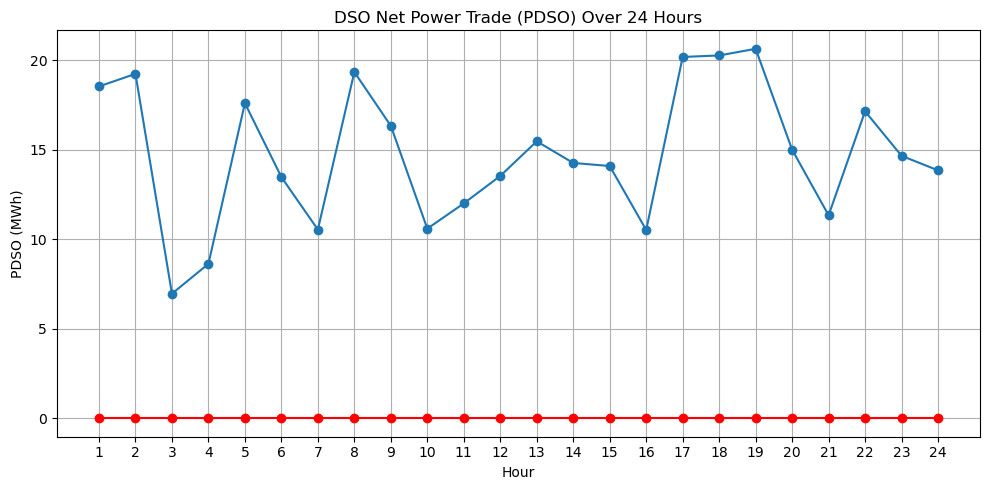

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(1, T+1), PDSO_p_values.values(), marker='o', linestyle='-')
plt.plot(range(1, T+1), PDSO_s_values.values(), marker='o', linestyle='-', color='red')
plt.title('DSO Net Power Trade (PDSO) Over 24 Hours')
plt.xlabel('Hour')
plt.ylabel('PDSO (MWh)')
plt.grid(True)
plt.xticks(range(1, T+1))
plt.tight_layout()
plt.show()